<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/MST_EFM_POM_EDA_XLS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

### Express Freight Management Port Moresby

## Data Preparation

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

from sklearn.cluster import KMeans # Uncomment if required

In [2]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_excel('drive/MyDrive/Colab_Data/EFM_Data_June_22.xlsx', sheet_name=0, dtype={'StartLatLong': str, 'EndLatLong': str})
print(data.shape)
# data['ID'] = data['ID'].astype(int)
# data.set_index('ID', inplace=True)

(10205, 35)


In [4]:
data.head()

AssetExtra AssetHostID  AssetID  \
0  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
1  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
2  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
3  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
4  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   

                               SiteName DepartureDate    AssetName2  \
0  Express Freight POM / EFM POM Trukai    2022-06-01  DANZO ROWALI   
1  Express Freight POM / EFM POM Trukai    2022-06-01  DANZO ROWALI   
2  Express Freight POM / EFM POM Trukai    2022-06-01  DANZO ROWALI   
3  Express Freight POM / EFM POM Trukai    2022-06-01  DANZO ROWALI   
4  Express Freight POM / EFM POM Trukai    2022-06-01  DANZO ROWALI   

        AssetExtra2 FleetNumber DepartureTime TimeZone1  ...  \
0  23.02.2022 11:00    TRUCK 06      09:28:03  ChST/PGT  ...   
1  23.02.2022 11:00    TRUCK 06      09:52:07  ChST/PGT  ...   
2  23.02.2022 11:00    TRUCK 06      10:12:13  ChST/PGT  ...   
3  23.02.2022 11:00    TRUCK 06      10:49:57  ChST/PGT  ...   
4  23.02.2022 11:00    TRUCK 06      10:54:37  ChST/PGT  ...   

                                            ArriveAt           EndLatLong  \
0                   Outside EFM POM Office, Porebada  -9.41744 / 147.0756   
1  MIT - Consort Shipping, Motukea Dockyard, MIT ...  -9.42528 / 147.1095   
2                       EFM Napa Napa Site, Porebada  -9.41742 / 147.0762   
3                   Outside EFM POM Office, Porebada  -9.41842 / 147.0771   
4  MIT - Consort Shipping, Motukea Dockyard, MIT ...  -9.42525 / 147.1094   

  NextDepartureDateTime  TimeZone TimeAtLocation PassengerList NrOfVisits  \
0   2022-06-01 09:52:00  ChST/PGT       00:21:08           NaN        2.0   
1   2022-06-01 10:12:00  ChST/PGT       00:03:30           NaN        1.0   
2   2022-06-01 10:49:00  ChST/PGT       00:19:20           NaN        1.0   
3   2022-06-01 10:54:00  ChST/PGT       00:03:54           NaN        1.0   
4   2022-06-01 11:13:00  ChST/PGT       00:05:34           NaN        1.0   

   BlankJourneyType  TotalFuelUsedMeasured  CalcFuelConsumption  
0               NaN                    NaN                  NaN  
1               NaN                    NaN                  NaN  
2               NaN                    NaN                  NaN  
3               NaN                    NaN                  NaN  
4               NaN                    NaN                  NaN  

[5 rows x 35 columns]

In [5]:
# Empty/NA cells
data.isnull().any()

AssetExtra                   False
AssetHostID                  False
AssetID                      False
SiteName                     False
DepartureDate                False
AssetName2                   False
AssetExtra2                   True
FleetNumber                  False
DepartureTime                False
TimeZone1                    False
DepartFrom                   False
StartLatLong                 False
TripType                     False
TripClassificationComment     True
DrivingTime                  False
StandingTime                 False
Duration                     False
Distance                     False
StartOdoMeter                False
EndOdoMeter                  False
MaxSpeed                     False
AvgSpeed                     False
ArrivalTime                  False
ArrivalDate                  False
TimeZone2                    False
ArriveAt                     False
EndLatLong                   False
NextDepartureDateTime         True
TimeZone            

In [6]:
# Drop no necessary columns
data.drop(columns=['AssetExtra2','TripClassificationComment','PassengerList','BlankJourneyType','TotalFuelUsedMeasured','CalcFuelConsumption','NextDepartureDateTime'], inplace=True)

In [7]:
# Drop rows with Empty/NA cells uncomment if required
data = data.dropna(axis=0)
print(data.shape)
data.isnull().any()

(10143, 28)


AssetExtra        False
AssetHostID       False
AssetID           False
SiteName          False
DepartureDate     False
AssetName2        False
FleetNumber       False
DepartureTime     False
TimeZone1         False
DepartFrom        False
StartLatLong      False
TripType          False
DrivingTime       False
StandingTime      False
Duration          False
Distance          False
StartOdoMeter     False
EndOdoMeter       False
MaxSpeed          False
AvgSpeed          False
ArrivalTime       False
ArrivalDate       False
TimeZone2         False
ArriveAt          False
EndLatLong        False
TimeZone          False
TimeAtLocation    False
NrOfVisits        False
dtype: bool

In [8]:
data.dtypes

AssetExtra                object
AssetHostID               object
AssetID                  float64
SiteName                  object
DepartureDate     datetime64[ns]
AssetName2                object
FleetNumber               object
DepartureTime             object
TimeZone1                 object
DepartFrom                object
StartLatLong              object
TripType                  object
DrivingTime               object
StandingTime              object
Duration                  object
Distance                 float64
StartOdoMeter            float64
EndOdoMeter              float64
MaxSpeed                 float64
AvgSpeed                 float64
ArrivalTime               object
ArrivalDate       datetime64[ns]
TimeZone2                 object
ArriveAt                  object
EndLatLong                object
TimeZone                  object
TimeAtLocation            object
NrOfVisits               float64
dtype: object

In [9]:
data.describe(include=[object]).transpose()

count unique  \
AssetExtra      10143     72   
AssetHostID     10143     72   
SiteName        10143     10   
AssetName2      10143     81   
FleetNumber     10143     72   
DepartureTime   10143   9195   
TimeZone1       10143      1   
DepartFrom      10143    393   
StartLatLong    10143   5242   
TripType        10143      1   
DrivingTime     10143   2989   
StandingTime    10143   2299   
Duration        10143   3965   
ArrivalTime     10143   9211   
TimeZone2       10143      1   
ArriveAt        10143    383   
EndLatLong      10143   5113   
TimeZone        10143      1   
TimeAtLocation  10143   4983   

                                                              top   freq  
AssetExtra      EFM 69 POM - BDA 802 - ISUZU NPR 4 X 2 3 TON T...    340  
AssetHostID                                                BDA802    340  
SiteName                        Express Freight POM / EFM POM GFI   2065  
AssetName2                                            Kila Kaiulo    326  
FleetNumber                                              TRUCK 69    340  
DepartureTime                                            14:29:57      4  
TimeZone1                                                ChST/PGT  10143  
DepartFrom                           EFM Napa Napa Site, Porebada   1912  
StartLatLong                                  -9.42667 / 147.1113     75  
TripType                                             Unclassified  10143  
DrivingTime                                              00:00:06     35  
StandingTime                                             00:00:12     56  
Duration                                                 00:03:46     12  
ArrivalTime                                              14:39:37      3  
TimeZone2                                                ChST/PGT  10143  
ArriveAt                             EFM Napa Napa Site, Porebada   1978  
EndLatLong                                    -9.41575 / 147.0768     49  
TimeZone                                                 ChST/PGT  10143  
TimeAtLocation                                           00:02:08     31

In [10]:
# Drop time zones (all are in the same) and TripType(Unclassified)
data.drop(columns=['TimeZone1','TimeZone2','TimeZone','TripType'], inplace=True)

In [11]:
data.describe().transpose().round(2)

count      mean       std    min       25%        50%  \
AssetID        10143.0    244.04    164.20    5.0     46.00     279.00   
Distance       10143.0      8.44      9.30    0.0      0.70       6.20   
StartOdoMeter  10143.0  93811.30  68935.40  436.0  29351.85  101654.80   
EndOdoMeter    10143.0  93820.52  68936.94  436.6  29360.15  101661.20   
MaxSpeed       10143.0     50.16     23.44    5.0     32.00      57.00   
AvgSpeed       10143.0     21.63     12.08    0.0     11.61      23.23   
NrOfVisits     10143.0      1.69      1.37    1.0      1.00       1.00   

                     75%        max  
AssetID           425.00     474.00  
Distance           13.10     126.60  
StartOdoMeter  146964.60  273748.29  
EndOdoMeter    146976.91  273752.81  
MaxSpeed           68.00     119.00  
AvgSpeed           31.02      64.06  
NrOfVisits          2.00      20.00

count    10143.000000
mean         8.439446
std          9.303022
min          0.000000
25%          0.700000
50%          6.200000
75%         13.100000
max        126.600000
Name: Distance, dtype: float64

# of zeros: 613


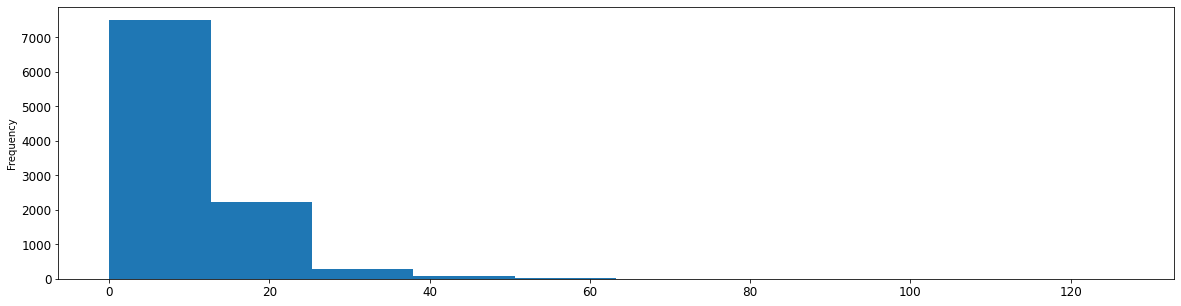

In [12]:
# Distance Distribution is OK, but too many zeros
print(data['Distance'].describe())
data['Distance'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['Distance']==0]))

count    10143.000000
mean         0.142266
std          0.635792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: Duration, dtype: float64

# of zeros: 9079


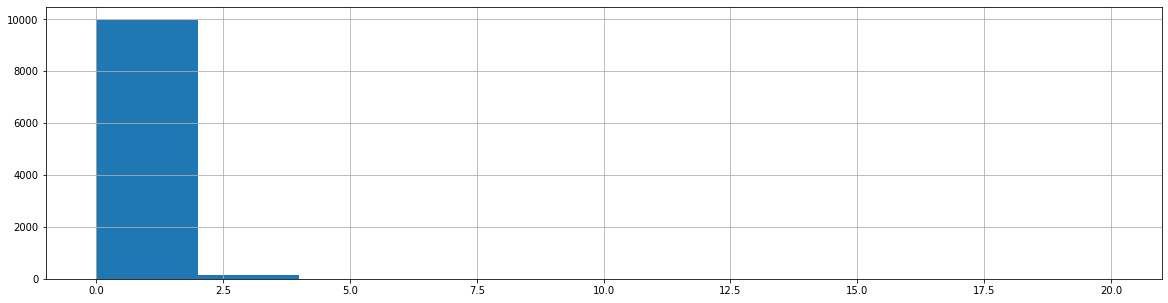

In [13]:
# Duration Distribution in hours not OK, but too many zeros
# Convert timestamps columns to date-time format
duration = data['Duration'].astype(str)
duration = duration.apply(pd.to_datetime)
print(duration.dt.hour.describe())
duration.dt.hour.hist(figsize = [20, 5])
print('\n# of zeros:',  len(duration[duration.dt.hour==0]))

count    10143.000000
mean        21.389037
std         15.326380
min          0.000000
25%          8.000000
50%         19.000000
75%         33.000000
max         59.000000
Name: Duration, dtype: float64

# of zeros: 152


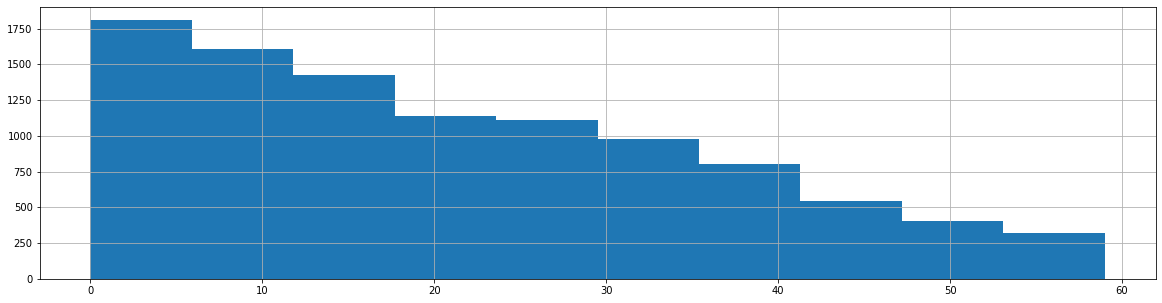

In [14]:
# Duration Distribution in minutes is OK
print(duration.dt.minute.describe())
duration.dt.minute.hist(figsize = [20, 5])
print('\n# of zeros:', len(duration[duration.dt.minute==0]))

count    10143.000000
mean         1.686680
std          1.373477
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: NrOfVisits, dtype: float64


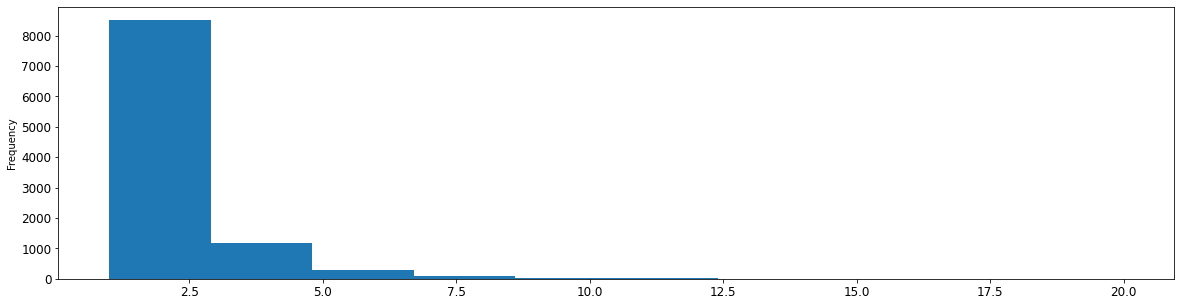

In [15]:
# Number of Visits Distribution is OK
print(data['NrOfVisits'].describe())
data['NrOfVisits'].plot.hist(figsize = [20, 5], fontsize = 12)

count    10143.000000
mean        50.164054
std         23.438707
min          5.000000
25%         32.000000
50%         57.000000
75%         68.000000
max        119.000000
Name: MaxSpeed, dtype: float64


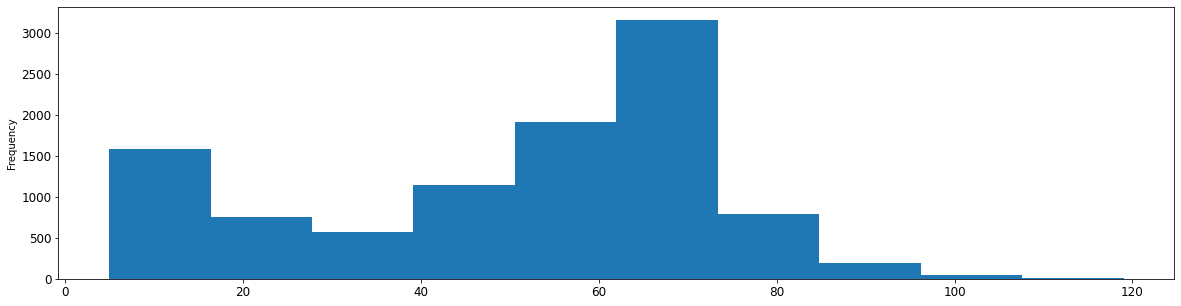

In [16]:
# Max Speed have 2 Distributions
print(data['MaxSpeed'].describe())
data['MaxSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)

count    10143.000000
mean        21.627843
std         12.076900
min          0.000000
25%         11.610000
50%         23.230000
75%         31.025000
max         64.060000
Name: AvgSpeed, dtype: float64

# of zeros: 620


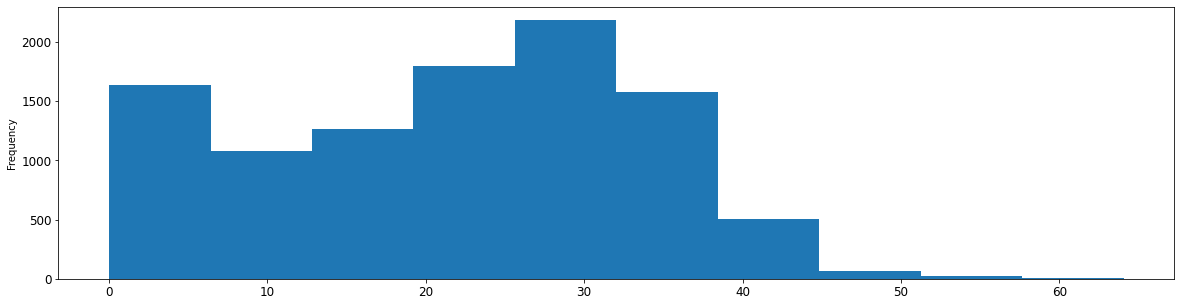

In [17]:
# Avg Speed is OK, but too many zeros
print(data['AvgSpeed'].describe())
data['AvgSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['AvgSpeed']==0]))

count    10143.000000
mean         9.218401
std         72.432660
min          0.000000
25%          0.800000
50%          6.300000
75%         13.100000
max       7236.410000
dtype: float64

# of zeros: 581


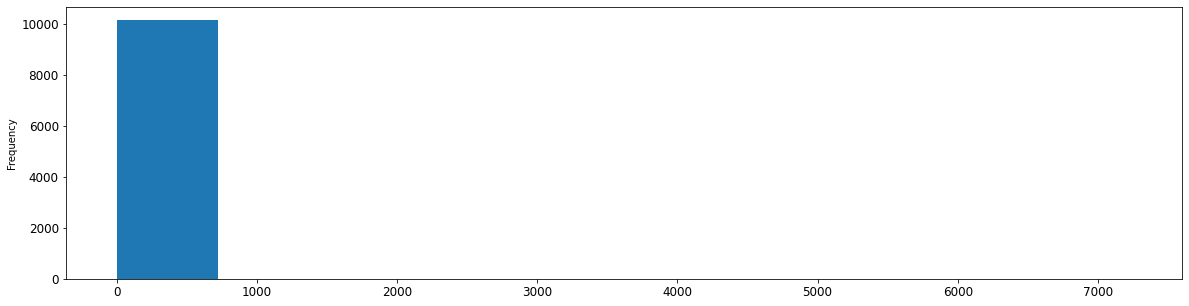

In [18]:
# OdoMeter Delta is not equal to Distance, too many zeros
print((data['EndOdoMeter'] - data['StartOdoMeter']).describe())
(data['EndOdoMeter'] - data['StartOdoMeter']).plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[(data['EndOdoMeter'] - data['StartOdoMeter'])==0]))

In [19]:
# The OdoMeter delta is more than the max distance
data[(data['EndOdoMeter'] - data['StartOdoMeter'])>126.6]

AssetExtra AssetHostID  AssetID  \
527   EFM 17 POM - Isuzu FTR Flat Top Single Axle 6 ...      BCF700     22.0   
2740           EFM 50 POM - Isuzu Prime Mover (BFN 536)      BFN536    185.0   

                                       SiteName DepartureDate  \
527   Express Freight POM / EFM POM Labour Runs    2022-06-07   
2740     Express Freight POM / EFM POM Main Ops    2022-06-01   

                        AssetName2 FleetNumber DepartureTime  \
527                    MUNA DIRONA    TRUCK 17      11:02:32   
2740  Alex Manale - (POM Workshop)    TRUCK 50      18:45:59   

                                             DepartFrom         StartLatLong  \
527   EFM Fuel Bowser Napanapa, EFM Napa Napa Fuel B...  -9.41578 / 147.0767   
2740     EFM Napa Napa Site, EFM POM Workshop, Porebada  -9.41536 / 147.0765   

      ... StartOdoMeter EndOdoMeter MaxSpeed  AvgSpeed  ArrivalTime  \
527   ...      220665.0   227901.41     65.0     29.24     11:03:26   
2740  ...      130492.5   130808.50     60.0     10.83     18:46:13   

      ArrivalDate                      ArriveAt           EndLatLong  \
527    2022-06-07  EFM Napa Napa Site, Porebada   -9.4175 / 147.0763   
2740   2022-06-01  EFM Napa Napa Site, Porebada  -9.41544 / 147.0768   

           TimeAtLocation NrOfVisits  
527              09:18:12        5.0  
2740  1900-01-05 14:39:50       11.0  

[2 rows x 24 columns]

count                        10143
mean     0 days 00:15:03.836931874
std      0 days 00:53:29.719641328
min              -1 days +00:02:17
25%                0 days 00:03:34
50%                0 days 00:13:35
75%         0 days 00:24:38.500000
max                0 days 03:29:29
dtype: object

# of zeros: 10130


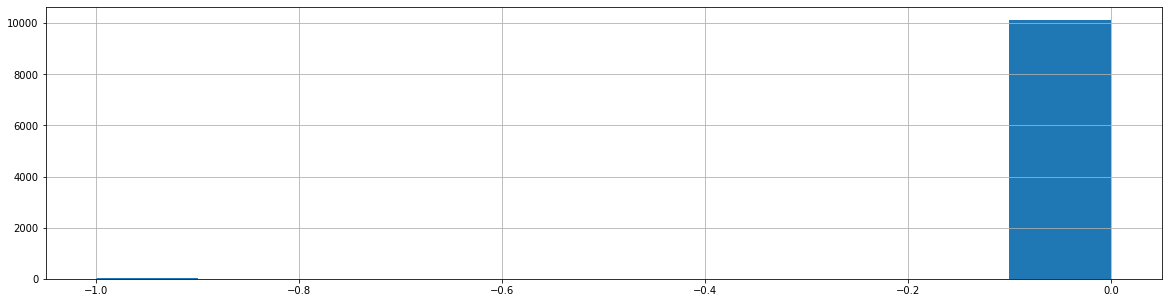

In [20]:
# Departure-Arrival Time Delta is not equal to Duration, too many zeros
departure = data['DepartureTime'].astype(str)
departure = departure.apply(pd.to_datetime)
arrival = data['ArrivalTime'].astype(str)
arrival = arrival.apply(pd.to_datetime)
print((arrival - departure).describe())
(arrival - departure).dt.days.hist(figsize = [20, 5])
print('\n# of zeros:', len(data[(arrival - departure).dt.days==0]))


In [21]:
# Negative Values in the arrival time - departure time
data[(arrival - departure).dt.days==-1]

AssetExtra AssetHostID  AssetID  \
931   EFM 21 POM - Isuzu FSR Flat Top Single Axle 6 ...      BCW944     24.0   
945   EFM 21 POM - Isuzu FSR Flat Top Single Axle 6 ...      BCW944     24.0   
965   EFM 21 POM - Isuzu FSR Flat Top Single Axle 6 ...      BCW944     24.0   
2371  EFM 42 POM - Isuzu Flat Top Single Axle 4X2 15...      BFH794    164.0   
2894           EFM 53 POM - Isuzu Small Truck (BFN 537)      BFN537    187.0   
3103  EFM 59 POM - CAMC Flat Top Tandem Axle 18 Tonn...      BFR099     94.0   
3264  EFM 59 POM - CAMC Flat Top Tandem Axle 18 Tonn...      BFR099     94.0   
3362  EFM 61 POM – ISUZU FSR Freight Forwarding (BFU...      BFU090    195.0   
7352   EFM 86 POM – CAMC Twin Steer  Flat Top (BGF 422)      BGF422    453.0   
7605         EFM 87 POM – CAMC 6 x 4 Flat Top (BGF 423)      BGF423    454.0   
9709              EFM POM - NISSAN PATROL S/W (BCD 554)      BCD554     42.0   
9734              EFM POM - NISSAN PATROL S/W (BCD 554)      BCD554     42.0   
9852             EFM POM - TOYOTA HILUX D/CAB (BEF 497)      BEF497     45.0   

                                       SiteName DepartureDate  \
931           Express Freight POM / EFM POM GFI    2022-06-15   
945           Express Freight POM / EFM POM GFI    2022-06-16   
965           Express Freight POM / EFM POM GFI    2022-06-17   
2371  Express Freight POM / EFM POM Labour Runs    2022-06-16   
2894  Express Freight POM / EFM POM Labour Runs    2022-06-16   
3103          Express Freight POM / EFM POM SPB    2022-06-07   
3264          Express Freight POM / EFM POM SPB    2022-06-18   
3362     Express Freight POM / EFM POM Main Ops    2022-06-17   
7352          Express Freight POM / EFM POM SPB    2022-06-16   
7605     Express Freight POM / EFM POM Main Ops    2022-06-17   
9709  Express Freight POM / EFM POM Mgr Vehicle    2022-06-04   
9734  Express Freight POM / EFM POM Mgr Vehicle    2022-06-09   
9852  Express Freight POM / EFM POM Mgr Vehicle    2022-06-03   

           AssetName2                                FleetNumber  \
931      DANIEL MERRA                                   TRUCK 21   
945      DANIEL MERRA                                   TRUCK 21   
965      DANIEL MERRA                                   TRUCK 21   
2371       WASINA Max                                   TRUCK 42   
2894    Vincent Maino                                   TRUCK 53   
3103         JOHN HAU                                   TRUCK 59   
3264  STEVEN POHANGAT                                   TRUCK 59   
3362       WASINA Max                                   TRUCK 61   
7352        Felix Kia                                   TRUCK 86   
7605  Merven Joseph 2                                   TRUCK 87   
9709    Brian EFM POM    LIGHT VEHICLE (Workshop - Vernon Lesch)   
9734    Brian EFM POM    LIGHT VEHICLE (Workshop - Vernon Lesch)   
9852    Chauka Molean  LIGHT VEHICLE (Transport - Chauka Molean)   

     DepartureTime                                         DepartFrom  \
931       23:51:22                                        9 Mile Area   
945       23:46:56         Waigani Dr, Port Moresby, Papua New Guinea   
965       23:42:13                           Hubert Murray H/Way 1 Rd   
2371      23:37:47                             D & M Trading, Taekone   
2894      23:27:50                                           Porebada   
3103      23:44:27                                        9 Mile Area   
3264      23:34:02                                        9 Mile Area   
3362      22:41:13                   Outside EFM POM Office, Porebada   
7352      23:49:05                                             Boroko   
7605      23:18:26                                    Kaevaga Village   
9709      23:57:04                                             Newton   
9734      23:59:42  Carl Vermaas Res, Bougainville Cres, Downtown,...   
9852      23:54:50                           Aviat Club Pom, Konedobu   

             StartLatLong  ... StartO

In [22]:
# Split Site Data into Company and Site name
data[['Company','SiteName']] = data['SiteName'].str.split(' / ', 1, expand=True)

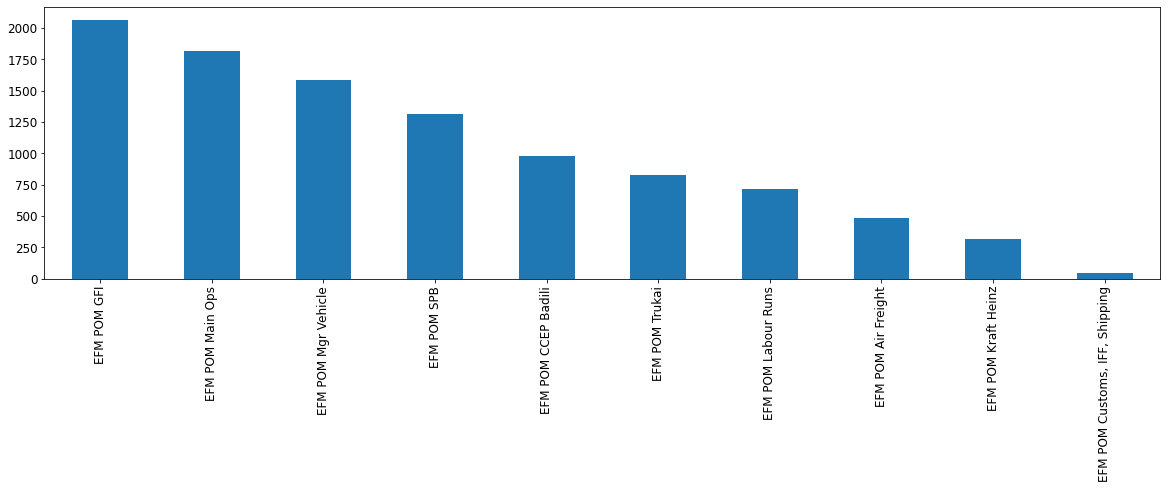

In [23]:
# Site Name Counts
data['SiteName'].value_counts().plot.bar(figsize = [20, 5], fontsize = 12)

In [24]:
# Asset Extra (description) Counts Same as Asset ID
data['AssetExtra'].value_counts().to_frame()


AssetExtra
EFM 69 POM - BDA 802 - ISUZU NPR 4 X 2 3 TON TR...         340
EFM AF 02 POM - NISSAN URVAN BUS (BEZ 002)                 321
EFM 70 POM - BFO 210 -  MITSUBISHI FUSO TRUCK              303
EFM 59 POM - CAMC Flat Top Tandem Axle 18 Tonne...         298
EFM 86 POM – CAMC Twin Steer  Flat Top (BGF 422)           292
...                                                        ...
EFM 58 POM - CAMC Flat Top Tandem Axle 18 Tonne...          37
EFM 19 POM - MAZDA BT-50 SINGLE CAB UTE (BFN 592)           27
EFM 31 POM - CAMC Prime Mover (BEN 113)                     26
EFM 39 POM - CAMC Prime Mover (BET 413) GFI                 14
EFM 34 POM - Hino Flat Top Single Axle 6 tonne ...           8

[72 rows x 1 columns]

count           10143
unique             81
top       Kila Kaiulo
freq              326
Name: AssetName2, dtype: object


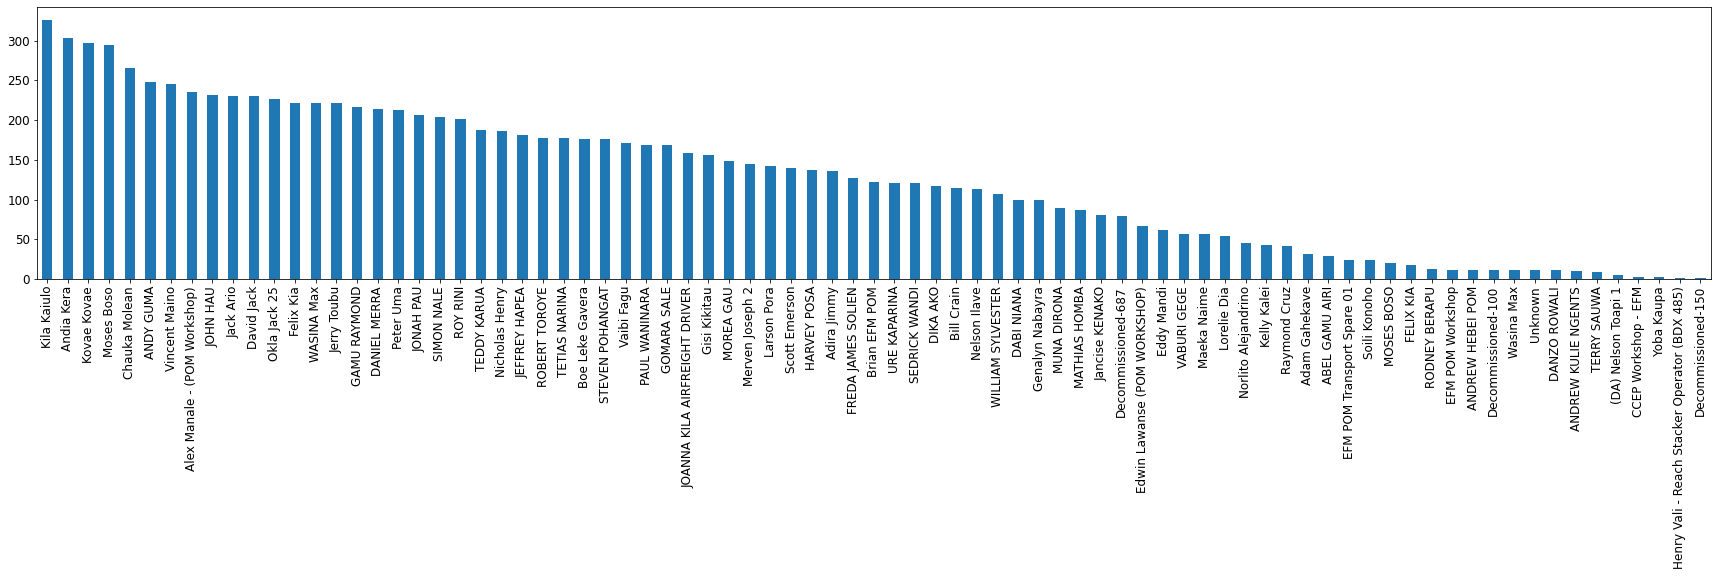

In [25]:
# Asset Counts
print(data['AssetName2'].describe())
data['AssetName2'].value_counts().plot.bar(figsize = [30, 5], fontsize = 12)

In [26]:
# Assets Usage
data[['AssetHostID','AssetID','AssetExtra','FleetNumber','NrOfVisits','Distance']].groupby(by=['AssetHostID','AssetID','AssetExtra','FleetNumber']).sum()

NrOfVisits  \
AssetHostID AssetID AssetExtra                                         FleetNumber                                           
BCD554      42.0    EFM POM - NISSAN PATROL S/W (BCD 554)              LIGHT VEHICLE (Workshop - Vernon Lesch)       177.0   
BCF700      22.0    EFM 17 POM - Isuzu FTR Flat Top Single Axle 6 t... TRUCK 17                                      269.0   
BCS460      80.0    EFM POM - MITSUBISHI D/CAB  (BCS 460)              LIGHT VEHICLE (Transport - Bill Crain)         51.0   
BCU786      16.0    EFM 20 POM - Nissan UD Prime Mover (BCU 786)       TRUCK 20                                      421.0   
BCW944      24.0    EFM 21 POM - Isuzu FSR Flat Top Single Axle 6 t... TRUCK 21                                      246.0   
...                                                                                                                    ...   
LBQ974      123.0   EFM 09 POM - CAMC Prime Mover (LBQ 974)            TRUCK 09                                       78.0   
LBS224      268.0   EFM POM - TOYOTA RAV 4 (LBS 224)                   LIGHT VEHICLE (LBS224)                        195.0   
LBW166      124.0   EFM 62 POM - CAMC Flat Top Tandem Axle Side Lif... TRUCK 62                                      406.0   
LBY242      422.0   EFM 90 POM - CAMC Sidelifter (LBY 242)             TRUCK 90                                      185.0   
LBY244      421.0   EFM 91 POM_CAMC Sidelifter (LBY 244)               TRUCK 91                                      212.0   

                                                                                                                Distance  
AssetHostID AssetID AssetExtra                                         FleetNumber                                        
BCD554      42.0    EFM POM - NISSAN PATROL S/W (BCD 554)              LIGHT VEHICLE (Workshop - Vernon Lesch)     919.3  
BCF700      22.0    EFM 17 POM - Isuzu FTR Flat Top Single Axle 6 t... TRUCK 17                                   2358.4  
BCS460      80.0    EFM POM - MITSUBISHI D/CAB  (BCS 460)              LIGHT VEHICLE (Transport - Bill Crain)      434.9  
BCU786      16.0    EFM 20 POM - Nissan UD Prime Mover (BCU 786)       TRUCK 20                                    834.0  
BCW944      24.0    EFM 21 POM - Isuzu FSR Flat Top Single Axle 6 t... TRUCK 21                                   1715.5  
...                                                                                                                  ...  
LBQ974      123.0   EFM 09 POM - CAMC Prime Mover (LBQ 974)            TRUCK 09                                    518.5  
LBS224      268.0   EFM POM - TOYOTA RAV 4 (LBS 224)                   LIGHT VEHICLE (LBS224)                     1346.3  
LBW166      124.0   EFM 62 POM - CAMC Flat Top Tandem Axle Side Lif... TRUCK 62                                   2008.3  
LBY242      422.0   EFM 90 POM - CAMC Sidelifter (LBY 242)             TRUCK 90                                    938.8  
LBY244      421.0   EFM 91 POM_CAMC Sidelifter (LBY 244)               TRUCK 91                                   1199.0  

[72 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


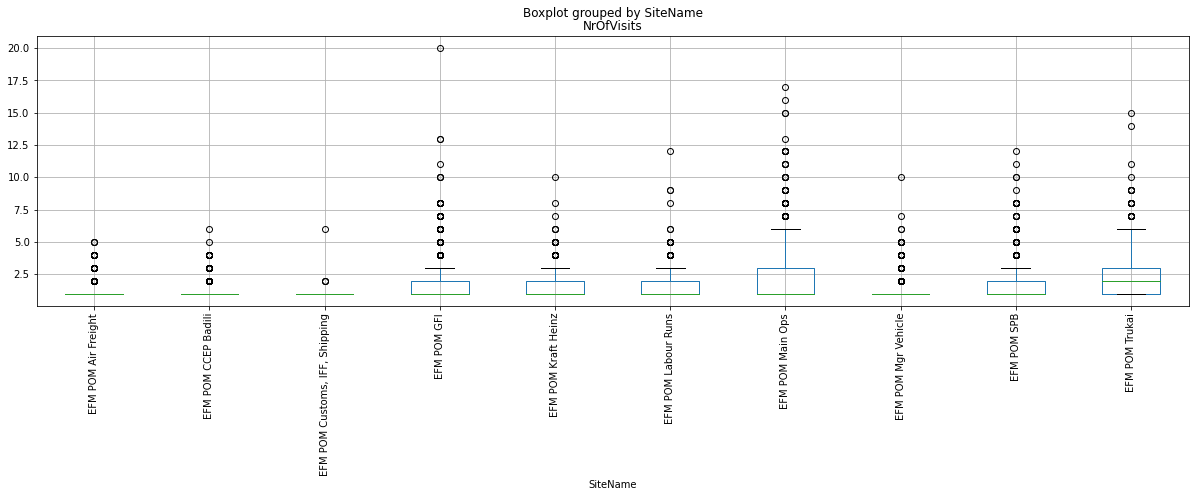

In [27]:
# Number of Visits per Site/Category
data.boxplot('NrOfVisits','SiteName', figsize = [20, 5], fontsize = 10, rot=90)

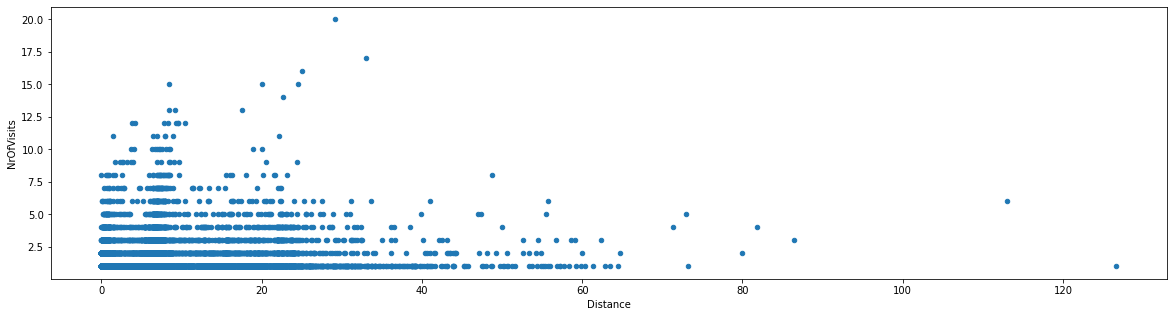

In [28]:
data.plot.scatter('Distance','NrOfVisits', figsize = [20, 5])

In [29]:
# Split Location Data into Latitude and Longitude and convert to float type (numeric)
data[['StartLat','StartLon']] = data['StartLatLong'].str.split(' / ', 1, expand=True)
data[['StartLat','StartLon']] = data[['StartLat','StartLon']].astype("float")
data[['EndLat','EndLon']] = data['EndLatLong'].str.split(' / ', 1, expand=True)
data[['EndLat','EndLon']] = data[['EndLat','EndLon']].astype("float")
# Drop Original Columns
data = data.drop(columns=['StartLatLong','EndLatLong'])

In [30]:
# Why zeros in the location coordinates?
data[data['StartLat']==0]

AssetExtra AssetHostID  AssetID  \
4966  EFM 73 POM - MAZDA BT-50 SINGLE CAB UTE (BGD 856)      BGD856    390.0   

                 SiteName DepartureDate  AssetName2       FleetNumber  \
4966  EFM POM Mgr Vehicle    2022-06-02  Bill Crain  LIGHT VEHICLE 73   

     DepartureTime DepartFrom DrivingTime  ... ArrivalTime ArrivalDate  \
4966      13:16:26  [UNKNOWN]    00:38:20  ...    13:51:22  2022-06-02   

       ArriveAt  TimeAtLocation  NrOfVisits              Company  StartLat  \
4966  [UNKNOWN]        00:25:14         2.0  Express Freight POM       0.0   

     StartLon EndLat EndLon  
4966      0.0    0.0    0.0  

[1 rows x 27 columns]

In [31]:
# Drop the row with the UNKNOWN Location (index 4966)
data = data.drop(index=4966)

In [32]:
# Range of Location coordinates grouped by DepartFrom are too wide (10-30 kms)
(data[['DepartFrom','StartLat','StartLon']].groupby(['DepartFrom']).min() - data[['DepartFrom','StartLat','StartLon']].groupby(['DepartFrom']).max()).sort_values('StartLon')



StartLat  StartLon
DepartFrom                                                      
Papua New Guinea                              -0.01772   -0.2492
Unnamed Road, Papua New Guinea                -0.11347   -0.1945
Papa Lea Lea Highway Rd                       -0.10619   -0.0602
9 Mile Area                                   -0.03575   -0.0526
8 Mile Area                                   -0.04544   -0.0390
...                                                ...       ...
Ela Beach Rd, Port Moresby, Papua New Guinea   0.00000    0.0000
Ela Beach Hotel                                0.00000    0.0000
Lifu Holdings Fuel Station                     0.00000    0.0000
Kwik Shop Waigani                              0.00000    0.0000
[UNKNOWN]                                      0.00000    0.0000

[393 rows x 2 columns]

In [33]:
# Range of Location coordinates grouped by DepartFrom are too wide (10-30 kms)
(data[['ArriveAt','EndLat','EndLon']].groupby(['ArriveAt']).min() - data[['ArriveAt','EndLat','EndLon']].groupby(['ArriveAt']).max()).sort_values('EndLon')

EndLat  EndLon
ArriveAt                                                     
Papua New Guinea                             -0.01766 -0.2492
Unnamed Road, Papua New Guinea               -0.11347 -0.1945
Papa Lea Lea Highway Rd                      -0.10614 -0.0602
Unnamed Road, Port Moresby, Papua New Guinea -0.05198 -0.0572
9 Mile Area                                  -0.03578 -0.0526
...                                               ...     ...
Lifu Holdings Fuel Station                    0.00000  0.0000
Leander St, Port Moresby, Papua New Guinea   -0.00005  0.0000
GFI Staging Area 2, Konedobu                 -0.00048  0.0000
LOLOATA RESORT - TAHIRA-BOOTLESS BAY          0.00000  0.0000
2 mile POM                                   -0.00006  0.0000

[383 rows x 2 columns]

In [34]:
data[data['DepartureDate'].dt.day==1]

AssetExtra AssetHostID  AssetID  \
0      EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
1      EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
2      EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
3      EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
4      EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...      BFB110    133.0   
...                                                  ...         ...      ...   
10042                   EFM POM - TOYOTA RAV 4 (LBS 224)      LBS224    268.0   
10043                   EFM POM - TOYOTA RAV 4 (LBS 224)      LBS224    268.0   
10044                   EFM POM - TOYOTA RAV 4 (LBS 224)      LBS224    268.0   
10045                   EFM POM - TOYOTA RAV 4 (LBS 224)      LBS224    268.0   
10046                   EFM POM - TOYOTA RAV 4 (LBS 224)      LBS224    268.0   

                  SiteName DepartureDate    AssetName2  \
0           EFM POM Trukai    2022-06-01  DANZO ROWALI   
1           EFM POM Trukai    2022-06-01  DANZO ROWALI   
2           EFM POM Trukai    2022-06-01  DANZO ROWALI   
3           EFM POM Trukai    2022-06-01  DANZO ROWALI   
4           EFM POM Trukai    2022-06-01  DANZO ROWALI   
...                    ...           ...           ...   
10042  EFM POM Mgr Vehicle    2022-06-01     Jack Ario   
10043  EFM POM Mgr Vehicle    2022-06-01     Jack Ario   
10044  EFM POM Mgr Vehicle    2022-06-01     Jack Ario   
10045  EFM POM Mgr Vehicle    2022-06-01     Jack Ario   
10046  EFM POM Mgr Vehicle    2022-06-01     Jack Ario   

                  FleetNumber DepartureTime  \
0                    TRUCK 06      09:28:03   
1                    TRUCK 06      09:52:07   
2                    TRUCK 06      10:12:13   
3                    TRUCK 06      10:49:57   
4                    TRUCK 06      10:54:37   
...                       ...           ...   
10042  LIGHT VEHICLE (LBS224)      06:54:46   
10043  LIGHT VEHICLE (LBS224)      07:24:33   
10044  LIGHT VEHICLE (LBS224)      07:42:13   
10045  LIGHT VEHICLE (LBS224)      19:02:27   
10046  LIGHT VEHICLE (LBS224)      19:53:24   

                                              DepartFrom DrivingTime  ...  \
0                           EFM Napa Napa Site, Porebada    00:13:47  ...   
1      EFM Napa Napa Site, Outside EFM POM Office, Po...    00:16:36  ...   
2      MIT - Consort Shipping, Motukea Dockyard, MIT ...    00:18:24  ...   
3                           EFM Napa Napa Site, Porebada    00:00:46  ...   
4                       Outside EFM POM Office, Porebada    00:13:04  ...   
...                                                  ...         ...  ...   
10042  EFM Napa Napa Site, Outside EFM POM Office, Po...    00:24:56  ...   
10043                    Gordons, SP Brewery Tipping Bay    00:08:48  ...   
10044                                       Hohola North    00:48:52  ...   
10045                     Desh Besh - Konedobu, Konedobu    00:28:01  ...   
10046  EFM Napa Napa Site, Outside EFM POM Office, Po...    00:22:22  ...   

      ArrivalTime ArrivalDate  \
0        09:30:59  2022-06-01   
1        10:08:43  2022-06-01   
2        10:30:37  2022-06-01   
3        10:50:43  2022-06-01   
4        11:07:41  2022-06-01   
...           ...         ...   
10042    07:19:42  2022-06-01   
10043    07:33:21  2022-06-01   
10044    08:29:43  2022-06-01   
10045    19:30:28  2022-06-01   
10046    20:15:46  2022-06-01   

                                                ArriveAt  TimeAtLocation  \
0                       Outside EFM POM Office, Porebada        00:21:08   
1      MIT - Consort Shipping, Motukea Dockyard, MIT ...        00:03:30   
2                           EFM Napa Napa Site, Porebada        00:19:20   
3                       Outside EFM POM Office, Porebada        00:03:54   
4      MIT - Consort Shipping, Motukea Dockyard, MIT ...        00:05:34   
...                              

Data Reduction

In [46]:
# Reduce the dataset as required 

site='EFM POM Trukai'
day_data = data[data['SiteName']==site]

day = 1 # Reduce to first day of the month only
day_data = data[data['DepartureDate'].dt.day==day]

# Drop unnecessary columns 
day_data = day_data.drop(columns=['Company','AssetHostID','FleetNumber','DepartureTime','DrivingTime','StandingTime','DepartFrom','ArriveAt','ArrivalTime','ArrivalDate','TimeAtLocation','StartOdoMeter','EndOdoMeter','MaxSpeed','AvgSpeed'])

# Rename remaining columns
day_data = day_data.rename(columns={'AssetExtra':'AssetDescription','AssetName2':'DriverName','SiteName':'Category','NrOfVisits':'Visits'})

# Reorder and Re-index the columns
day_data = day_data.reindex(columns=['AssetID','AssetDescription','Category','DriverName','Duration','Distance','Visits','StartLat','StartLon','EndLat','EndLon'])

day_data.head()

AssetID                                   AssetDescription        Category  \
0    133.0  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...  EFM POM Trukai   
1    133.0  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...  EFM POM Trukai   
2    133.0  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...  EFM POM Trukai   
3    133.0  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...  EFM POM Trukai   
4    133.0  EFM 06 POM - Isuzu FVR Flat Top Single Axle 6 ...  EFM POM Trukai   

     DriverName  Duration  Distance  Visits  StartLat  StartLon   EndLat  \
0  DANZO ROWALI  00:36:58       7.2     2.0  -9.41625  147.0758 -9.41744   
1  DANZO ROWALI  00:20:27       6.2     1.0  -9.41719  147.0755 -9.42528   
2  DANZO ROWALI  00:37:44       6.9     1.0  -9.42528  147.1096 -9.41742   
3  DANZO ROWALI  00:04:40       0.1     1.0  -9.41744  147.0762 -9.41842   
4  DANZO ROWALI  00:18:38       6.0     1.0  -9.41844  147.0771 -9.42525   

     EndLon  
0  147.0756  
1  147.1095  
2  147.0762  
3  147.0771  
4  147.1094

In [47]:
# Save the reduced dataset to an Excel Spreadsheet
day_data.to_excel('EFM_day_data.xlsx', sheet_name='daily')
!cp EFM_day_data.xlsx "/content/drive/My Drive/Colab_Data/"

## Geolocation Data

In [48]:
# Install necessary Libraries, uncomment if required
# !pip install geopandas
!pip install folium
import folium # map rendering library
from folium import plugins
# import geopandas as gpd
# from geopy.geocoders import Nominatim
# from shapely.geometry import LineString, Point
import matplotlib.cm as cm
import matplotlib.colors as colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
# Create a new Dataframe for Unique Origin Location
origins = day_data[['AssetID','StartLat','StartLon']].groupby(['AssetID','StartLat','StartLon']).mean().reset_index()
origins

AssetID  StartLat  StartLon
0        5.0  -9.46675  147.1592
1        5.0  -9.46597  147.1584
2        5.0  -9.46592  147.1584
3        5.0  -9.46558  147.1581
4        5.0  -9.45139  147.1929
..       ...       ...       ...
633    474.0  -9.41714  147.0754
634    474.0  -9.41669  147.0752
635    474.0  -9.41625  147.0754
636    474.0  -9.41622  147.0759
637    474.0  -9.41581  147.0757

[638 rows x 3 columns]

In [50]:
# Create a new Dataframe for Unique Destinations
destinations = day_data[['AssetID','EndLat','EndLon']].groupby(['AssetID','EndLat','EndLon']).count().reset_index()
destinations

AssetID   EndLat    EndLon
0        5.0 -9.46678  147.1592
1        5.0 -9.46675  147.1592
2        5.0 -9.46664  147.1591
3        5.0 -9.46550  147.1580
4        5.0 -9.45136  147.1929
..       ...      ...       ...
631    474.0 -9.41661  147.0757
632    474.0 -9.41594  147.0757
633    474.0 -9.41594  147.0766
634    474.0 -9.41592  147.0757
635    474.0 -9.41583  147.0761

[636 rows x 3 columns]

In [53]:
# create a Port Moresby map using latitude and longitude values from destinations
map_pom = folium.Map(location=[-9.4,	147.2], zoom_start=12)

# add red markers to map for destinations
for lat, lon, id in zip(destinations['EndLat'], destinations['EndLon'], destinations['AssetID']):
    label = '{}'.format(id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_opacity = 1,
        parse_html=False).add_to(map_pom)

# add blue markers to map for origins
for lat, lon, id in zip(origins['StartLat'], origins['StartLon'], origins['AssetID']):
    label = '{}'.format(id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity = 0,
        parse_html=False).add_to(map_pom)    
 
map_pom

In [54]:
# create another Port Moresby map using latitude and longitude values from destinations
map_pom2 = folium.Map(location=[-9.4,	147.2], zoom_start=12)

# set color scheme for the asset IDs
ids = origins.AssetID.unique()
ys = [i + ids + (i*ids)**2 for i in range(len(ids))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add rainbow of markers to the map for asset ids
markers_colors = []
for lat, lon, id in zip(destinations['EndLat'], destinations['EndLon'], destinations['AssetID']):
    label = '{}'.format(id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(np.where(ids == id)[0])],
        fill=True,
        fill_color=rainbow[int(np.where(ids == id)[0])],
        fill_opacity = 1,
        parse_html=False).add_to(map_pom2)   

map_pom2

## Weekly Seasonality

In [42]:
# Extract Seasonal Data
daily_data = data[['DepartureDate','NrOfVisits']].groupby(by=data['DepartureDate'].dt.date).sum().reset_index()
# daily_data.plot.line(x='DepartureDate',y='NrOfVisits',figsize = [20, 5])

In [43]:
# Import FB Prophet
from fbprophet import Prophet
# Create FB Prophet Model
prophet = daily_data.rename(columns={'DepartureDate':'ds','NrOfVisits':'y'}) 
m=Prophet(daily_seasonality=True)
m.fit(prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


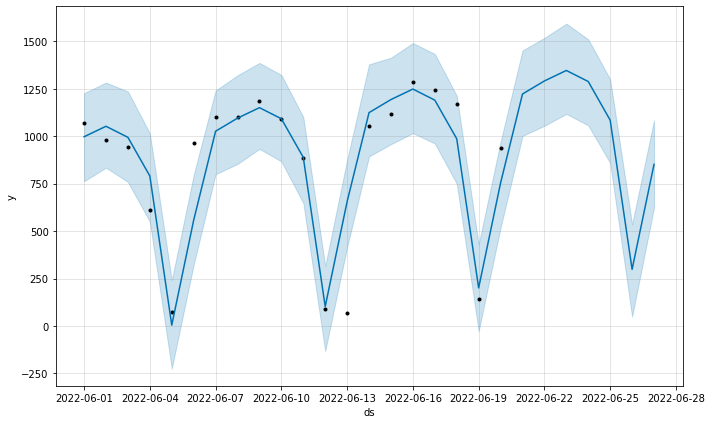

In [44]:
# Forecast one week in the future
periods = 7
future=m.make_future_dataframe(periods)
forecast=m.predict(future)
figure1=m.plot(forecast, xlabel='ds', ylabel='y')

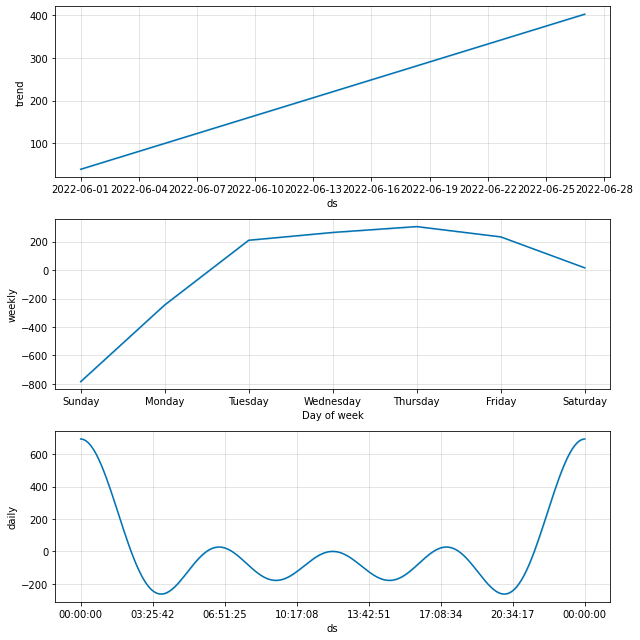

In [45]:
figure2=m.plot_components(forecast)